In [22]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns
from sklearn import datasets

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

import googlemaps
from datetime import datetime

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

## Querying from that database into Python

#### 1. Connect Python to mta database

In [23]:
engine = create_engine("sqlite:///mta_data.db")
insp = inspect(engine)
print(insp.get_table_names())

['mta_data']


In [24]:
data = pd.read_sql('PRAGMA table_info(mta_data)', engine);
if "C/A" in data.name:
    # update column name from C/A to CA
    conn =  engine.connect()
    conn.execute('ALTER TABLE mta_data RENAME COLUMN "C/A" TO "CA"')
else:
    print("No need to update")

No need to update


#### 2. Explore the Database
   - Querying from that database into Python via SQLAlchemy is required

In [25]:
mta_data = pd.read_sql('SELECT * FROM mta_data order by DATE ASC limit 10;', engine)
mta_data

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,20:00:00,REGULAR,7561578,2583031
6,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6698358,1523748
7,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,6698362,1523749
8,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,6698370,1523761
9,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,6698405,1523790


In [26]:
# check if the data is collected within 
mta_data = pd.read_sql('SELECt COUNT(DISTINCT DATE) FROM mta_data order by DATE ASC;', engine)
mta_data

,COUNT(DISTINCT DATE)
0,140


In [27]:
mta_data = pd.read_sql('select count(*) from mta_data', engine)
mta_data

,count(*)
0,4187239


In [28]:
mta_data = pd.read_sql('SELECT * FROM mta_data order by ENTRIES desc;', engine)
mta_data.head(10)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,01:00:00,REGULAR,2147429816,671147622
1,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,05:00:00,REGULAR,2147429813,671147623
2,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,09:00:00,REGULAR,2147429789,671147631
3,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,13:00:00,REGULAR,2147429724,671147646
4,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,17:00:00,REGULAR,2147429654,671147677
5,J003,R352,00-00-00,HEWES ST,JM,BMT,04/24/2021,21:00:00,REGULAR,2147429588,671147700
6,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,01:00:00,REGULAR,2147429567,671147707
7,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,05:00:00,REGULAR,2147429563,671147714
8,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,09:00:00,REGULAR,2147429544,671147731
9,J003,R352,00-00-00,HEWES ST,JM,BMT,04/25/2021,13:00:00,REGULAR,2147429516,671147757


In [29]:
mta_data.tail(10)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
4187229,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,08:00:00,REGULAR,0,14
4187230,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,12:00:00,REGULAR,0,14
4187231,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,16:00:00,REGULAR,0,14
4187232,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/29/2021,20:00:00,REGULAR,0,14
4187233,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,00:00:00,REGULAR,0,14
4187234,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,04:00:00,REGULAR,0,14
4187235,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,08:00:00,REGULAR,0,14
4187236,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,12:00:00,REGULAR,0,14
4187237,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,16:00:00,REGULAR,0,14
4187238,R728,R226,00-05-01,GUN HILL RD,5,IRT,04/30/2021,20:00:00,REGULAR,0,14


In [30]:
mta_data = pd.read_sql('select * from mta_data where ENTRIES==0; ', engine)
mta_data.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,00:00:00,REGULAR,0,910
1,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,04:00:00,REGULAR,0,910
2,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,08:00:00,REGULAR,0,910
3,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,12:00:00,REGULAR,0,910
4,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,16:00:00,REGULAR,0,910
5,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/04/2021,20:00:00,REGULAR,0,910
6,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,00:00:00,REGULAR,0,910
7,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,04:00:00,REGULAR,0,910
8,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,08:00:00,REGULAR,0,910
9,A002,R051,02-05-01,59 ST,NQR456W,BMT,09/05/2021,12:00:00,REGULAR,0,910


- The entries shows 0 and exits shows 910 - abnormal.. but the goal of the analysis is to find the stations/turnstiles with the most crowd in entrance. we ignore the abnormal issue here 


In [31]:
mta_data = pd.read_sql('select * from mta_data where EXITS==0; ', engine)
mta_data.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,00:00:00,REGULAR,524476,0
1,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,04:00:00,REGULAR,524476,0
2,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,08:00:00,REGULAR,524476,0
3,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,12:00:00,REGULAR,524476,0
4,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,16:00:00,REGULAR,524476,0
5,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/04/2021,20:00:00,REGULAR,524476,0
6,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,00:00:00,REGULAR,524476,0
7,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,04:00:00,REGULAR,524477,0
8,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,08:00:00,REGULAR,524477,0
9,A002,R051,02-05-00,59 ST,NQR456W,BMT,09/05/2021,12:00:00,REGULAR,524477,0


In [32]:
mta_data = pd.read_sql('select count(*) from mta_data where EXITS==0 and ENTRIES> 1000; ', engine)
mta_data.head(10)

,count(*)
0,119197


#### Issue observed
- The exits shows 0 but entries shows larger than 1,000 - abnormal.. maybe the station shut down for unknow issue?
- there are 119197 records with this problem. not sure about the reason, 
- for the further analysis, we may look into the analysis result from (1) with these abnormal data (2) without these abnormal data to check the differences


In [33]:
# check the turnstiles with top (max) 5 records in each day

mta_data = pd.read_sql('SELECT *, COUNT(*) FROM mta_data GROUP BY CA, UNIT, SCP, DATE HAVING COUNT(*) IN \
(SELECT MAX(c) FROM (SELECT distinct COUNT(ENTRIES) AS c FROM mta_data GROUP BY  CA, UNIT, SCP, DATE order by c desc));', engine)
mta_data.head()



,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COUNT(*)
0,N110,R283,00-00-00,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,19045,25148,55
1,N110,R283,00-00-01,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,5308,8176,55
2,N110,R283,00-00-02,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,1176925,2248870,55
3,N110,R283,00-03-00,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,502859,1771856,55
4,N110,R283,00-03-01,LAFAYETTE AV,C,IND,07/02/2021,01:00:00,REGULAR,1057467,810958,55


In [34]:
# check total number of turnstiles each date
mta_data = pd.read_sql("SELECT *, count(*) FROM mta_data group by CA, UNIT, SCP, DATE order by DATE asc;", engine)
mta_data.head(20)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,count(*)
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,6
1,A002,R051,02-00-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6698358,1523748,6
2,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,1426009,5385019,6
3,A002,R051,02-03-01,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,1580988,2464894,6
4,A002,R051,02-03-02,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,13350,17213,6
5,A002,R051,02-03-03,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,6141463,6991882,6
6,A002,R051,02-03-04,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7560411,3903296,6
7,A002,R051,02-03-05,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,12140284,1463972,6
8,A002,R051,02-03-06,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,9465498,514843,6
9,A002,R051,02-05-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,524429,0,6


In [35]:
mta_dataset=pd.read_sql("select * from mta_data where DATE BETWEEN '05-01-2021' AND '09-01-2021';", engine)
mta_dataset.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,12:00:00,REGULAR,7626086,2609191
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,16:00:00,REGULAR,7626206,2609221
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,20:00:00,REGULAR,7626348,2609238
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,00:00:00,REGULAR,7626446,2609254
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,04:00:00,REGULAR,7626452,2609259
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,08:00:00,REGULAR,7626464,2609272
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2021,12:00:00,REGULAR,7626508,2609309


In [36]:
mta_dataset.ENTRIES.count()

3679429

In [37]:
mta_dataset.DATE.nunique()

123

In [38]:
mta_dataset.DATE.sort_values().head(5)

3616662    05/01/2021
3564201    05/01/2021
3564202    05/01/2021
3564203    05/01/2021
3564204    05/01/2021
Name: DATE, dtype: object

In [39]:
mta_dataset.DATE.sort_values().tail(5)

21901    08/31/2021
21902    08/31/2021
21903    08/31/2021
72265    08/31/2021
71140    08/31/2021
Name: DATE, dtype: object

In [40]:
# copy the retrived mta for pandas analysis
mta_dfs = mta_dataset

## Exploratory data analysis in pandas 

In [41]:
# explore the data
mta_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679429 entries, 0 to 3679428
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 308.8+ MB


In [42]:
# check column format
mta_dfs.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [43]:
mta_dfs.dtypes

CA          object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [44]:
#detect empty value
mta_dfs.isna().sum()

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [45]:
import datetime

In [46]:
# Take the date and time fields into a single datetime column
mta_dfs["DATETIME"] = pd.to_datetime(mta_dfs.DATE+" "+ mta_dfs.TIME, format="%m/%d/%Y %H:%M:%S")

mta_dfs.head(5)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,00:00:00,REGULAR,7625998,2609113,2021-08-28 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,04:00:00,REGULAR,7626014,2609117,2021-08-28 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,08:00:00,REGULAR,7626024,2609135,2021-08-28 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,12:00:00,REGULAR,7626086,2609191,2021-08-28 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2021,16:00:00,REGULAR,7626206,2609221,2021-08-28 16:00:00


In [47]:
mta_dfs.dtypes

CA                  object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE                object
TIME                object
DESC                object
ENTRIES              int64
EXITS                int64
DATETIME    datetime64[ns]
dtype: object

In [48]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_dfs
.groupby(["CA", "UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
313628,B024,R211,00-05-00,KINGS HWY,2021-05-02 16:00:00,2
3308705,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 00:00:00,2
313621,B024,R211,00-05-00,KINGS HWY,2021-05-01 12:00:00,2
313620,B024,R211,00-05-00,KINGS HWY,2021-05-01 08:00:00,2
313652,B024,R211,00-05-00,KINGS HWY,2021-05-06 16:00:00,2


In [49]:
#check on record with duplicate entries in the same datetime

mask = ((mta_dfs["CA"]=="R514") &
       (mta_dfs["UNIT"]=="R094") &
        (mta_dfs["SCP"] =="00-05-00") &
       (mta_dfs["DATETIME"].dt.date == datetime.datetime(2021, 7, 22).date()))

mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1355449,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,REGULAR,3,0,2021-07-22 00:00:00
1355450,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00
1355451,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,REGULAR,3,0,2021-07-22 04:00:00
1355452,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00
1355453,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:39:19,REGULAR,3,0,2021-07-22 07:39:19
1355454,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:40:57,REGULAR,3,0,2021-07-22 07:40:57
1355455,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,REGULAR,3,0,2021-07-22 08:00:00
1355456,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,RECOVR AUD,262243,0,2021-07-22 08:00:00
1355457,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,REGULAR,3,0,2021-07-22 12:00:00
1355458,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,RECOVR AUD,262243,0,2021-07-22 12:00:00


In [50]:
mask = ((mta_dfs["CA"]=="R514") &
       (mta_dfs["UNIT"]=="R094") &
        (mta_dfs["SCP"] =="00-05-00") &
       (mta_dfs["DATETIME"].dt.date == datetime.datetime(2021, 7, 21).date()))

mta_dfs[mask]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1355444,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,04:00:00,REGULAR,2,0,2021-07-21 04:00:00
1355445,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,08:00:00,REGULAR,2,0,2021-07-21 08:00:00
1355446,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,12:00:00,REGULAR,2,0,2021-07-21 12:00:00
1355447,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,16:00:00,REGULAR,3,0,2021-07-21 16:00:00
1355448,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/21/2021,20:00:00,REGULAR,3,0,2021-07-21 20:00:00


- From the data in pre_date (07/21), RECOVR AUD seem not correct. Should keep the Regular One for following analysis.

In [51]:
mta_dfs.DESC.value_counts()

REGULAR       3663459
RECOVR AUD      15970
Name: DESC, dtype: int64

In [52]:
# sort the turnstiles data in descending order 
mta_dfs.sort_values(["CA", "UNIT","SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
#drop the the duplicates 
mta_dfs.drop_duplicates(subset=["CA","UNIT","SCP", "STATION", "DATETIME"], inplace=True)

In [53]:
mta_dfs.DESC.value_counts()

REGULAR       3663459
RECOVR AUD      15889
Name: DESC, dtype: int64

In [54]:
# verify if value for subset ["CA","UNIT","SCP", "STATION", "DATETIME"] is unique
(mta_dfs
.groupby( ["CA","UNIT","SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending = False)).head(5)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-01 00:00:00,1
2452974,R138,R293,00-03-04,34 ST-PENN STA,2021-07-21 10:00:00,1
2452892,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 18:00:00,1
2452893,R138,R293,00-03-04,34 ST-PENN STA,2021-07-07 22:00:00,1
2452894,R138,R293,00-03-04,34 ST-PENN STA,2021-07-08 02:00:00,1


- No more duplicate Entries

In [55]:
mta_dfs.head(5)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
120377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,REGULAR,5554,616,2021-08-31 21:00:00
120376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,REGULAR,5554,616,2021-08-31 17:00:00
120375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,RECOVR AUD,5554,616,2021-08-31 13:00:00
120374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,REGULAR,5554,616,2021-08-31 09:00:00
120373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,REGULAR,5554,616,2021-08-31 05:00:00


## EDA Data backup
 - dataset used for the further analysis

In [56]:
#backup the half - cleaned data - the duplicates removed & add Datetime
mta_dfs_toProcess = mta_dfs
mta_dfs.to_csv("mta_dfs_toProcess.csv",index=False)

In [57]:
mta_dfs = mta_dfs.drop(["EXITS", "DESC"], axis=1, errors="ignore")


In [58]:
mta_dfs

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
120377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,21:00:00,5554,2021-08-31 21:00:00
120376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,5554,2021-08-31 17:00:00
120375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,5554,2021-08-31 13:00:00
120374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,5554,2021-08-31 09:00:00
120373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,5554,2021-08-31 05:00:00
...,...,...,...,...,...,...,...,...,...,...
3470258,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,16:00:00,7564813,2021-05-01 16:00:00
3470257,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,12:00:00,7564691,2021-05-01 12:00:00
3470256,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,08:00:00,7564642,2021-05-01 08:00:00
3470255,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,04:00:00,7564621,2021-05-01 04:00:00


- each row represents a turnstile (identified by a combination of the C/A, UNIT, SCP, and STATION columns) at a specific time -- approximately four hours apart. The ENTRIES column represents cumulative entries at that point in time.

In [59]:
mta_dfs[(mta_dfs["CA"]=="A002")&
        (mta_dfs["UNIT"] =="R051") & 
        (mta_dfs["SCP"] =="02-00-00") &
        (mta_dfs["STATION"]=="59 ST") &
         (mta_dfs["DATE"] == "05/01/2021")]


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
3470259,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,20:00:00,7564974,2021-05-01 20:00:00
3470258,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,16:00:00,7564813,2021-05-01 16:00:00
3470257,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,12:00:00,7564691,2021-05-01 12:00:00
3470256,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,08:00:00,7564642,2021-05-01 08:00:00
3470255,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,04:00:00,7564621,2021-05-01 04:00:00
3470254,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/01/2021,00:00:00,7564613,2021-05-01 00:00:00


- The entries is cummulative value. The total entries of the day occur at the last record of the day. Since the mta_dfs is sorted in descending order per group ["CA","UNIT","SCP", "STATION", "DATE"]. We read the last recod of the day (located at the top of the group) using the .first() DataFrame method.

In [60]:
mta_dfs_daily = (mta_dfs
          .groupby(["CA","UNIT","SCP", "STATION", "DATE"], as_index=False)
                 .ENTRIES.first()
                )
mta_dfs_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964


In [61]:
mta_dfs_daily_2 = (mta_dfs
                      .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                      .agg({'ENTRIES':['max'], 'LINENAME':['first'], 'DIVISION':['first'], 'DATETIME':['max']}))

In [62]:
mta_dfs_daily_2.dtypes

CA                         object
UNIT                       object
SCP                        object
STATION                    object
DATE                       object
ENTRIES   max               int64
LINENAME  first            object
DIVISION  first            object
DATETIME  max      datetime64[ns]
dtype: object

In [63]:
mta_dfs_daily_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614215 entries, 0 to 614214
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   (CA, )             614215 non-null  object        
 1   (UNIT, )           614215 non-null  object        
 2   (SCP, )            614215 non-null  object        
 3   (STATION, )        614215 non-null  object        
 4   (DATE, )           614215 non-null  object        
 5   (ENTRIES, max)     614215 non-null  int64         
 6   (LINENAME, first)  614215 non-null  object        
 7   (DIVISION, first)  614215 non-null  object        
 8   (DATETIME, max)    614215 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 46.9+ MB


In [64]:
mta_dfs_daily_2.columns = [column[0] for column in mta_dfs_daily_2.columns]

In [65]:
mta_dfs_daily_2.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'LINENAME',
       'DIVISION', 'DATETIME'],
      dtype='object')

In [66]:
mta_dfs_daily_2

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,R,RIT,2021-08-27 21:00:00
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,R,RIT,2021-08-28 21:00:00
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,R,RIT,2021-08-29 21:00:00
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,R,RIT,2021-08-30 21:00:00


In [67]:
mta_dfs_daily_entries = mta_dfs_daily_2.copy()

In [68]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,R,RIT,2021-08-27 21:00:00
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,R,RIT,2021-08-28 21:00:00
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,R,RIT,2021-08-29 21:00:00
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,R,RIT,2021-08-30 21:00:00


### Problem 3b
- Use the daily maximum `ENTRIES` calculations from Problem 3a. Recall that the `ENTRIES` column contains **cumulative entries** on each day. We would now like you to calculate **daily entries**, i.e. the number of new entries gained each day.
- *Hint:* Group the data by turnstile. Check out the `.shift()` (or `.diff()`) DataFrame methods for this purpose. *Ensure things make sense;* you *may* need to use the  `.apply()` method for abnormalities.

In [69]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,NQR456W,BMT,2021-05-01 20:00:00
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00
...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,R,RIT,2021-08-27 21:00:00
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,R,RIT,2021-08-28 21:00:00
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,R,RIT,2021-08-29 21:00:00
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,R,RIT,2021-08-30 21:00:00


In [70]:
mta_dfs_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (mta_dfs_daily_entries
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [71]:
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0
...,...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,R,RIT,2021-08-27 21:00:00,08/26/2021,5554.0
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,R,RIT,2021-08-28 21:00:00,08/27/2021,5554.0
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,R,RIT,2021-08-29 21:00:00,08/28/2021,5554.0
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,R,RIT,2021-08-30 21:00:00,08/29/2021,5554.0


In [72]:
mta_dfs_daily_entries[(mta_dfs_daily_entries['PREV_DATE'].isna())].head(10)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,05/01/2021,7564974,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
123,A002,R051,02-00-01,59 ST,05/01/2021,6701149,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
246,A002,R051,02-03-00,59 ST,05/01/2021,1427337,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
369,A002,R051,02-03-01,59 ST,05/01/2021,1584850,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
492,A002,R051,02-03-02,59 ST,05/01/2021,16430,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
615,A002,R051,02-03-03,59 ST,05/01/2021,6143868,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
738,A002,R051,02-03-04,59 ST,05/01/2021,7563309,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
861,A002,R051,02-03-05,59 ST,05/01/2021,12145355,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
984,A002,R051,02-03-06,59 ST,05/01/2021,9468421,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN
1107,A002,R051,02-05-00,59 ST,05/01/2021,524430,NQR456W,BMT,2021-05-01 20:00:00,NaN,NaN


In [73]:
mta_dfs_daily_entries[(mta_dfs_daily_entries['CA']=="A002") \
                      & (mta_dfs_daily_entries['UNIT']=="R051")]\
                    .sort_values('DATE')\
                    .value_counts().head(30)

CA    UNIT  SCP       STATION  DATE        ENTRIES   LINENAME  DIVISION  DATETIME             PREV_DATE   PREV_ENTRIES
A002  R051  02-00-00  59 ST    05/02/2021  7565300   NQR456W   BMT       2021-05-02 20:00:00  05/01/2021  7564974.0       1
            02-03-06  59 ST    05/09/2021  9471786   NQR456W   BMT       2021-05-09 20:00:00  05/08/2021  9471588.0       1
                               05/07/2021  9471316   NQR456W   BMT       2021-05-07 20:00:00  05/06/2021  9470719.0       1
                               05/06/2021  9470719   NQR456W   BMT       2021-05-06 20:00:00  05/05/2021  9470194.0       1
                               05/05/2021  9470194   NQR456W   BMT       2021-05-05 20:00:00  05/04/2021  9469656.0       1
                               05/04/2021  9469656   NQR456W   BMT       2021-05-04 20:00:00  05/03/2021  9469090.0       1
                               05/03/2021  9469090   NQR456W   BMT       2021-05-03 20:00:00  05/02/2021  9468636.0       1
             

In [74]:
mta_dfs_daily_entries.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'LINENAME',
       'DIVISION', 'DATETIME', 'PREV_DATE', 'PREV_ENTRIES'],
      dtype='object')

In [75]:
# Drop the rows for the earliest date in the mta_dfs_daily_entries
mta_dfs_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [76]:
mta_dfs_daily_entries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609185 entries, 1 to 614214
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CA            609185 non-null  object        
 1   UNIT          609185 non-null  object        
 2   SCP           609185 non-null  object        
 3   STATION       609185 non-null  object        
 4   DATE          609185 non-null  object        
 5   ENTRIES       609185 non-null  int64         
 6   LINENAME      609185 non-null  object        
 7   DIVISION      609185 non-null  object        
 8   DATETIME      609185 non-null  datetime64[ns]
 9   PREV_DATE     609185 non-null  object        
 10  PREV_ENTRIES  609185 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 55.8+ MB


In [77]:
(mta_dfs_daily_entries['ENTRIES'] -mta_dfs_daily_entries['PREV_ENTRIES']).describe()

count    6.091850e+05
mean    -5.517337e+03
std      3.335444e+06
min     -1.383110e+09
25%      7.900000e+01
50%      2.580000e+02
75%      5.130000e+02
max      1.179009e+09
dtype: float64

#### Issues observed:
-  negative values.
- Some values are *way* too big ( by the difference between the `max` and the `75%` percentile). 


In [78]:
# How many rows are backwards
mta_dfs_daily_entries[mta_dfs_daily_entries["ENTRIES"] < mta_dfs_daily_entries["PREV_ENTRIES"]].shape

(5721, 11)

In [79]:
# check the data
mta_dfs_daily_entries[mta_dfs_daily_entries["ENTRIES"] < mta_dfs_daily_entries["PREV_ENTRIES"]].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES
4798,A011,R080,01-03-00,57 ST-7 AV,05/02/2021,885608056,NQRW,BMT,2021-05-02 20:00:00,05/01/2021,885608240.0
4799,A011,R080,01-03-00,57 ST-7 AV,05/03/2021,885607915,NQRW,BMT,2021-05-03 20:00:00,05/02/2021,885608056.0
4800,A011,R080,01-03-00,57 ST-7 AV,05/04/2021,885607682,NQRW,BMT,2021-05-04 20:00:00,05/03/2021,885607915.0
4801,A011,R080,01-03-00,57 ST-7 AV,05/05/2021,885607416,NQRW,BMT,2021-05-05 20:00:00,05/04/2021,885607682.0
4802,A011,R080,01-03-00,57 ST-7 AV,05/06/2021,885607137,NQRW,BMT,2021-05-06 20:00:00,05/05/2021,885607416.0


In [80]:
# check the detail entries with the reverse counting 
mask = ((mta_dfs["CA"] == "A011") & 
(mta_dfs["UNIT"] == "R080") & 
(mta_dfs["SCP"] == "01-03-00") & 
(mta_dfs["STATION"] == "57 ST-7 AV") &
(mta_dfs["DATETIME"].dt.date >= datetime(2021, 5, 2).date()) &
        (mta_dfs["DATETIME"].dt.date <= datetime(2021, 5, 3).date()))


TypeError: 'module' object is not callable

In [ ]:
mta_dfs[mask]

In [ ]:
x = mta_dfs[mask].DATETIME.tolist()

label=['2021-05-03 20:00:00','2021-05-03 16:00:00', '2021-05-03 12:00:00', '2021-05-03 08:00:00','2021-05-03 04:00:00', 
      '2021-05-02 20:00:00','2021-05-02 16:00:00', '2021-05-02 12:00:00', '2021-05-02 08:00:00','2021-05-02 04:00:00']
plt.plot( mta_dfs[mask].DATETIME.tolist(), mta_dfs[mask].ENTRIES.tolist())
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

-  the counter is working reversely

In [ ]:
# confirm the reverse counting ENTRIES in each tunrstile/each day is pulled from the ENTRIES in the earliest record of that day
mask = ((mta_dfs_daily_entries["CA"] == "A011") & 
(mta_dfs_daily_entries["UNIT"] == "R080") & 
(mta_dfs_daily_entries["SCP"] == "01-03-00") & 
(mta_dfs_daily_entries["STATION"] == "57 ST-7 AV") &
(mta_dfs_daily_entries["DATETIME"].dt.date >= datetime(2021, 5, 2).date()) &
        (mta_dfs_daily_entries["DATETIME"].dt.date <= datetime(2021, 5, 3).date()))
mta_dfs_daily_entries[mask]

#### check how many entries has this issue

In [ ]:
# Let's see how many stations have this problem

(mta_dfs_daily_entries[mta_dfs_daily_entries['ENTRIES'] <mta_dfs_daily_entries['PREV_ENTRIES']]
.groupby(['CA', 'UNIT', 'SCP', 'STATION'])
.count())

#### solve issue2
 - use apply function to reverse the reverse counting entries
 - (1) flip the sign for the daily diff entries
 - (2) If the diff is bigger than (max_counter) then take the smaller one if the smaller value is less than max_counter, otherwise, reset to 0
 - max_counter:  In 2020, the subway has daily ridership of approximately 2 million. Times Square-42nd Street station is the busiest station in 2020 and  the average daily ridership of the Times Square-42nd Street station in 2019 was a staggering 178,138. In this analysis, the data entries here is counted every 4 hours in each turnstile; therefore, assume the max_counter as 200,000 for each turnstile per day


 https://new.mta.info/agency/new-york-city-transit/subway-bus-ridership-2020
 https://www.timessquarenyc.org/do-business/market-research-data/transit-ridership
 
 
 

In [515]:
def get_daily_counts(row, max_counter):
    counter = row.ENTRIES - row.PREV_ENTRIES
    if counter < 0: # reverse counting
        counter = -counter
    if counter > max_counter:
        # try to take the min first
        print(f'entries: {row.ENTRIES} <-- {row.PREV_ENTRIES}')
        counter = min(row.ENTRIES, row.PREV_ENTRIES)
    if counter > max_counter: 
        # if still too big , reset to 0 
        return 0 
    
    return counter

In [516]:
# test1: max_counter=1000000  maxium number of entry into turnstile in a day 
mta_dfs_daily_entries['DAILY_ENTRIES_TEST1'] = mta_dfs_daily_entries.apply(get_daily_counts, axis = 1, max_counter=1000000)

entries: 3109 <-- 1390173.0
entries: 160 <-- 479907.0
entries: 205 <-- 4341004.0
entries: 14 <-- 1028362.0
entries: 182 <-- 765804.0
entries: 327866 <-- 756269765.0
entries: 1132 <-- 328024.0
entries: 27 <-- 262152.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 458752 <-- 24.0
entries: 101 <-- 2651127.0
entries: 8 <-- 458758.0
entries: 167790157 <-- 702266.0
entries: 48 <-- 8724126.0
entries: 901 <-- 659349.0
entries: 393216 <-- 728.0
entries: 327680 <-- 4.0
entries: 1 <-- 327690.0
entries: 164 <-- 2627869.0
entries: 460 <-- 1605140.0
entries: 6588 <-- 4298891.0
entries: 0 <-- 117440512.0
entries: 8986986 <-- 29083.0
entries: 29438 <-- 8986986.0
entries: 11310395 <-- 1893566.0
entries: 1894639 <-- 11310395.0
entries: 990 <-- 367525.0
entries: 778 <-- 8883051.0
entries: 851 <-- 500619.0
entries: 328315 <-- 7577112.0
entries: 240 <-- 4780276.0
entries: 85 <-- 490316.0
entries: 67109632 <-- 14.0
entries: 327682 <-- 67109640.0
entries: 15 <-- 67109632.0
entries: 276 <-- 755

In [517]:
mta_dfs_daily_entries.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES_TEST1
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,586.0


In [518]:
mta_dfs_daily_entries.DAILY_ENTRIES_TEST1.describe()


count    609185.000000
mean        371.358454
std        1253.014195
min           0.000000
25%          85.000000
50%         263.000000
75%         520.000000
max      198150.000000
Name: DAILY_ENTRIES_TEST1, dtype: float64

 - diff between max and 75% still very big, take a smaller max_counter
 - try a 500000 as maxium numer in for 4 hours of a day per turnstile(since daily average is 2M of riders for 472 subway stations for 24 hours)

In [840]:
# # test2: max_counter=100000, maxium number of entry into turnstile in a day within 4 hours

mta_dfs_daily_entries['DAILY_ENTRIES_TEST2'] = mta_dfs_daily_entries.apply(get_daily_counts, axis = 1, max_counter=100000)

entries: 3109 <-- 1390173.0
entries: 160 <-- 479907.0
entries: 205 <-- 4341004.0
entries: 14 <-- 1028362.0
entries: 182 <-- 765804.0
entries: 235 <-- 150038.0
entries: 327866 <-- 756269765.0
entries: 1132 <-- 328024.0
entries: 27 <-- 262152.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 458752 <-- 24.0
entries: 101 <-- 2651127.0
entries: 458754 <-- 262214.0
entries: 8 <-- 458758.0
entries: 167790157 <-- 702266.0
entries: 48 <-- 8724126.0
entries: 65 <-- 106396.0
entries: 458754 <-- 262144.0
entries: 901 <-- 659349.0
entries: 1064 <-- 150473.0
entries: 393216 <-- 728.0
entries: 327680 <-- 4.0
entries: 1 <-- 327690.0
entries: 164 <-- 2627869.0
entries: 460 <-- 1605140.0
entries: 6588 <-- 4298891.0
entries: 0 <-- 117440512.0
entries: 8986986 <-- 29083.0
entries: 29438 <-- 8986986.0
entries: 11310395 <-- 1893566.0
entries: 1894639 <-- 11310395.0
entries: 990 <-- 367525.0
entries: 778 <-- 8883051.0
entries: 340 <-- 157816.0
entries: 851 <-- 500619.0
entries: 328315 <-- 75771

In [841]:
mta_dfs_daily_entries.DAILY_ENTRIES_TEST2.describe()


count    609185.000000
mean        364.915147
std         719.492412
min           0.000000
25%          85.000000
50%         263.000000
75%         520.000000
max       98439.000000
Name: DAILY_ENTRIES_TEST2, dtype: float64

In [842]:
mta_dfs_daily_entries.describe()

,ENTRIES,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES,DAILY_ENTRIES_TEST2
count,6.091850e+05,6.091850e+05,609185.000000,609185.000000,609185.000000
mean,4.157559e+07,4.158110e+07,2.983289,400.055239,364.915147
std,2.181575e+08,2.181687e+08,2.020460,3438.074646,719.492412
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2.146370e+05,2.146020e+05,1.000000,85.000000,85.000000
50%,1.397484e+06,1.397851e+06,3.000000,263.000000,263.000000
75%,5.996050e+06,5.996756e+06,5.000000,520.000000,520.000000
max,2.147427e+09,2.147427e+09,6.000000,499768.000000,98439.000000


In [843]:
# Keep Test2 DAILY_ENTRIES_TEST2
mta_dfs_daily_entries = mta_dfs_daily_entries.drop(["DAILY_ENTRIES_TEST1","DAILY_ENTRIES"], axis=1, errors="ignore")
mta_dfs_daily_entries

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES_TEST2
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,3,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,R,RIT,2021-08-27 21:00:00,08/26/2021,5554.0,4,0.0
614211,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,R,RIT,2021-08-28 21:00:00,08/27/2021,5554.0,5,0.0
614212,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,R,RIT,2021-08-29 21:00:00,08/28/2021,5554.0,6,0.0
614213,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,R,RIT,2021-08-30 21:00:00,08/29/2021,5554.0,0,0.0


In [844]:
#-- From the mean , std vs max, use TEST2 for further analysis
mta_dfs_daily_entries.rename(columns={'DAILY_ENTRIES_TEST2': 'DAILY_ENTRIES'}, inplace=True)

In [845]:
mta_dfs_daily_entries.describe()

,ENTRIES,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES
count,6.091850e+05,6.091850e+05,609185.000000,609185.000000
mean,4.157559e+07,4.158110e+07,2.983289,364.915147
std,2.181575e+08,2.181687e+08,2.020460,719.492412
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.146370e+05,2.146020e+05,1.000000,85.000000
50%,1.397484e+06,1.397851e+06,3.000000,263.000000
75%,5.996050e+06,5.996756e+06,5.000000,520.000000
max,2.147427e+09,2.147427e+09,6.000000,98439.000000


In [846]:
mta_dfs_daily_entries['DAY_OF_WEEKS'] = mta_dfs_daily_entries.DATETIME.dt.weekday

In [847]:
mta_dfs_daily_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,3,586.0


In [848]:
#get weekend data for analysis

mask = ( (mta_dfs_daily_entries['DAY_OF_WEEKS']==5) | (mta_dfs_daily_entries['DAY_OF_WEEKS']==6))

mta_dfs_weekend_entries = mta_dfs_daily_entries[mask].copy()

mta_dfs_weekend_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,6,326.0
7,A002,R051,02-00-00,59 ST,05/08/2021,7568516,NQR456W,BMT,2021-05-08 20:00:00,05/07/2021,7568106.0,5,410.0
8,A002,R051,02-00-00,59 ST,05/09/2021,7568840,NQR456W,BMT,2021-05-09 20:00:00,05/08/2021,7568516.0,6,324.0
14,A002,R051,02-00-00,59 ST,05/15/2021,7572186,NQR456W,BMT,2021-05-15 20:00:00,05/14/2021,7571785.0,5,401.0
15,A002,R051,02-00-00,59 ST,05/16/2021,7572532,NQR456W,BMT,2021-05-16 20:00:00,05/15/2021,7572186.0,6,346.0


In [849]:
#get weekday data for analysis

mask = ((mta_dfs_daily_entries['DAY_OF_WEEKS']>=0) & (mta_dfs_daily_entries['DAY_OF_WEEKS'] < 5))

mta_dfs_weekday_entries = mta_dfs_daily_entries[mask].copy()

mta_dfs_weekday_entries.head(5)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,3,586.0
6,A002,R051,02-00-00,59 ST,05/07/2021,7568106,NQR456W,BMT,2021-05-07 20:00:00,05/06/2021,7567550.0,4,556.0


### Analysis1: each ControlArea/UNIT/STATION combo, for each day
#### 1 Summary data (Daily)
- For each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby) - some  ControlArea/UNIT/STATION  has multiple turnstiles; some has only one

In [850]:
ca_unit_station_daily = mta_dfs_daily_entries.groupby(['CA','UNIT', 'STATION','DATE'])[['DAILY_ENTRIES']].sum().reset_index()

In [851]:
ca_unit_station_daily.head()

,CA,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,05/02/2021,2590.0
1,A002,R051,59 ST,05/03/2021,4379.0
2,A002,R051,59 ST,05/04/2021,4890.0
3,A002,R051,59 ST,05/05/2021,4847.0
4,A002,R051,59 ST,05/06/2021,5068.0


In [852]:
ca_unit_station_daily.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES
56070,56070,PTH22,R540,PATH NEW WTC,05/06/2021,293680.0
56176,56176,PTH22,R540,PATH NEW WTC,08/20/2021,137167.0
56135,56135,PTH22,R540,PATH NEW WTC,07/10/2021,93973.0
56132,56132,PTH22,R540,PATH NEW WTC,07/07/2021,93425.0
21700,21700,JFK03,R536,JFK JAMAICA CT1,08/28/2021,93319.0
63789,63789,R172,R192,CATHEDRAL PKWY,06/08/2021,90927.0
40824,40824,N324,R018,JKSN HT-ROOSVLT,08/02/2021,90409.0
24828,24828,N029,R333,116 ST,07/19/2021,89522.0
54162,54162,PTH03,R552,JOURNAL SQUARE,06/19/2021,85294.0
87526,87526,R621,R060,EASTN PKWY-MUSM,08/27/2021,84130.0


#### 1.1 Weekday data
- For each ControlArea/UNIT/STATION combo for weekday 

In [853]:
ca_unit_station_weekday = mta_dfs_weekday_entries.groupby(['CA','UNIT', 'STATION', 'DATE'])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_weekday.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES
39982,39982,PTH22,R540,PATH NEW WTC,05/06/2021,293680.0
40058,40058,PTH22,R540,PATH NEW WTC,08/20/2021,137167.0
40026,40026,PTH22,R540,PATH NEW WTC,07/07/2021,93425.0
45486,45486,R172,R192,CATHEDRAL PKWY,06/08/2021,90927.0
29111,29111,N324,R018,JKSN HT-ROOSVLT,08/02/2021,90409.0
17704,17704,N029,R333,116 ST,07/19/2021,89522.0
62411,62411,R621,R060,EASTN PKWY-MUSM,08/27/2021,84130.0
39371,39371,PTH13,R541,THIRTY ST,05/04/2021,80634.0
39661,39661,PTH18,R549,NEWARK BM BW,06/14/2021,75954.0
17596,17596,N026,R102,125 ST,06/18/2021,74881.0


#### 1.2 Weekend data
- For each ControlArea/UNIT/STATION combo for weekend
- sum the counts from each turnstile belonging to that combo. (hint: pd.groupby) - some  ControlArea/UNIT/STATION  has multiple turnstiles; some has only one

In [854]:
ca_unit_station_weekend = mta_dfs_weekend_entries.groupby(['CA','UNIT', 'STATION', 'DATE'])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_weekend.reset_index().sort_values("DAILY_ENTRIES", ascending=False).head(10)

,index,CA,UNIT,STATION,DATE,DAILY_ENTRIES
16106,16106,PTH22,R540,PATH NEW WTC,07/10/2021,93973.0
6224,6224,JFK03,R536,JFK JAMAICA CT1,08/28/2021,93319.0
15540,15540,PTH03,R552,JOURNAL SQUARE,06/19/2021,85294.0
16102,16102,PTH22,R540,PATH NEW WTC,06/26/2021,77780.0
15554,15554,PTH03,R552,JOURNAL SQUARE,08/07/2021,76921.0
17869,17869,R160,R164,66 ST-LINCOLN,08/22/2021,75223.0
15555,15555,PTH03,R552,JOURNAL SQUARE,08/08/2021,74681.0
6130,6130,JFK01,R535,HOWARD BCH JFK,06/05/2021,73159.0
4144,4144,G001,R151,CONEY IS-STILLW,06/20/2021,72637.0
17943,17943,R161B,R452,72 ST,05/08/2021,70624.0


### Analysis2: daily entries for all the turnstiles in each station
#### 2 Summary data (Daily)
-  Daily time series for each STATION, by adding up the daily entries for all the turnstiles in each station.some has only one

In [855]:
station_daily = mta_dfs_daily_entries.groupby(["STATION", "DATE"])[["DAILY_ENTRIES"]].sum().reset_index()
station_daily.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,DATE,DAILY_ENTRIES
38385,PATH NEW WTC,05/06/2021,293680.0
38491,PATH NEW WTC,08/20/2021,137167.0
7452,34 ST-PENN STA,05/14/2021,105356.0
810,116 ST,07/19/2021,100910.0
1145,125 ST,06/18/2021,97491.0
31436,JKSN HT-ROOSVLT,08/02/2021,95461.0
21622,CATHEDRAL PKWY,06/08/2021,94625.0
38450,PATH NEW WTC,07/10/2021,93973.0
38447,PATH NEW WTC,07/07/2021,93425.0
31340,JFK JAMAICA CT1,08/28/2021,93319.0


#### 2.1 Weekday data
- For each STATION combo for weekday 

In [856]:
station_weekday = mta_dfs_weekday_entries.groupby(["STATION", "DATE"])[["DAILY_ENTRIES"]].sum().reset_index()
station_weekday.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,DATE,DAILY_ENTRIES
27368,PATH NEW WTC,05/06/2021,293680.0
27444,PATH NEW WTC,08/20/2021,137167.0
5314,34 ST-PENN STA,05/14/2021,105356.0
577,116 ST,07/19/2021,100910.0
817,125 ST,06/18/2021,97491.0
22414,JKSN HT-ROOSVLT,08/02/2021,95461.0
15416,CATHEDRAL PKWY,06/08/2021,94625.0
27412,PATH NEW WTC,07/07/2021,93425.0
18257,EASTN PKWY-MUSM,08/27/2021,84130.0
8488,72 ST,07/16/2021,83076.0


#### 2.2 Weekend data
- Weekend time series for each STATIO
- adding up the daily entries for all the turnstiles in each station

In [857]:
station_weekend = mta_dfs_weekend_entries.groupby(["STATION", "DATE"])[["DAILY_ENTRIES"]].sum().reset_index()
station_weekend.sort_values("DAILY_ENTRIES", ascending = False).head(10)

,STATION,DATE,DAILY_ENTRIES
11035,PATH NEW WTC,07/10/2021,93973.0
8993,JFK JAMAICA CT1,08/28/2021,93319.0
9043,JOURNAL SQUARE,06/19/2021,85294.0
11031,PATH NEW WTC,06/26/2021,77780.0
9057,JOURNAL SQUARE,08/07/2021,76921.0
3396,72 ST,05/08/2021,76623.0
3217,66 ST-LINCOLN,08/22/2021,76128.0
6664,CONEY IS-STILLW,06/20/2021,74852.0
9058,JOURNAL SQUARE,08/08/2021,74681.0
8514,HOWARD BCH JFK,06/05/2021,74074.0


#### Analysis3: total ridership for each station  from 05-01-2021 to 08-31-2021
#### Summary data (Daily)
- sum the total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time we've captured.

In [858]:
stations_daily_totals = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_daily_totals.head(10)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,5242619.0
59,34 ST-HERALD SQ,4019117.0
233,GRD CNTRL-42 ST,3696735.0
68,42 ST-PORT AUTH,3511165.0
110,86 ST,3483518.0
46,23 ST,3396799.0
9,125 ST,3324501.0
14,14 ST-UNION SQ,3237302.0
315,PATH NEW WTC,2891759.0
353,TIMES SQ-42 ST,2850442.0


#### 3.1 Weekday data
- Total rides for each STATION , list the top 10 total rides on the weekday 

In [859]:
stations_weekday_totals = station_weekday.groupby('STATION')['DAILY_ENTRIES'].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_weekday_totals.head(10)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,4191732.0
59,34 ST-HERALD SQ,3160182.0
233,GRD CNTRL-42 ST,3023835.0
110,86 ST,2821408.0
68,42 ST-PORT AUTH,2743734.0
46,23 ST,2726231.0
9,125 ST,2643050.0
14,14 ST-UNION SQ,2483850.0
315,PATH NEW WTC,2359509.0
226,FULTON ST,2219679.0


#### 3.2 Weekend data
- Total rides for each STATION , list the top 10 total rides on the weekend

In [860]:
stations_weekend_totals = station_weekend.groupby('STATION')['DAILY_ENTRIES'].sum().\
                reset_index().sort_values('DAILY_ENTRIES', ascending=False)
stations_weekend_totals.head(10)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,1050887.0
59,34 ST-HERALD SQ,858935.0
68,42 ST-PORT AUTH,767431.0
14,14 ST-UNION SQ,753452.0
9,125 ST,681451.0
233,GRD CNTRL-42 ST,672900.0
46,23 ST,670568.0
110,86 ST,662110.0
353,TIMES SQ-42 ST,655511.0
217,FLUSHING-MAIN,626938.0


In [1128]:
daily_topN_stations = stations_daily_totals['STATION'].copy().tolist()

In [1129]:
weekday_topN_stations = stations_weekday_totals['STATION'].copy().tolist()

In [1130]:
weekend_topN_stations = stations_weekend_totals['STATION'].copy().tolist()

In [1031]:
 stations_weekday_totals['STATION'].tail(2)

141     BEACH 105 ST
309    ORCHARD BEACH
Name: STATION, dtype: object

In [864]:
set(weekday_top10_stations) ^ set(weekend_top10_stations)

{'FLUSHING-MAIN', 'FULTON ST', 'PATH NEW WTC', 'TIMES SQ-42 ST'}

In [865]:
busy_stations = set(weekday_top10_stations).union(set(weekend_top10_stations))
list(busy_stations)



['125 ST',
 '14 ST-UNION SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '34 ST-PENN STA',
 'PATH NEW WTC',
 '34 ST-HERALD SQ',
 'FLUSHING-MAIN',
 '86 ST',
 '42 ST-PORT AUTH',
 'FULTON ST',
 'GRD CNTRL-42 ST']

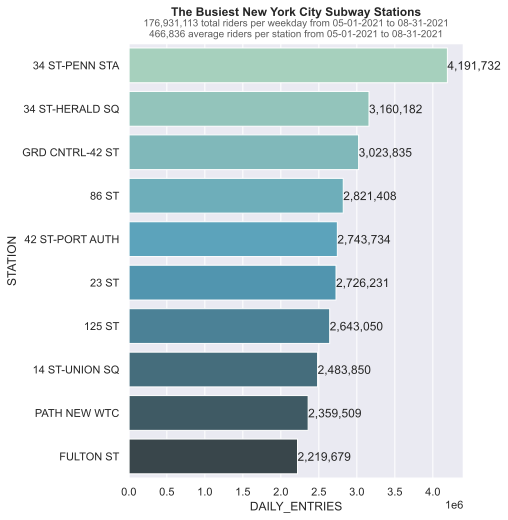

In [955]:

#weekday
sns.set(rc={"figure.figsize":(6,8)})
ax = sns.barplot(y="STATION",x="DAILY_ENTRIES", data=stations_weekday_totals.head(10),palette="GnBu_d")



ax.text(x=0.5, y=1.058, s='The Busiest New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.035, s='{:,.0f} total riders per weekday from 05-01-2021 to 08-31-2021'.format(int(stations_weekday_totals.DAILY_ENTRIES.sum())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.010, s='{:,.0f} average riders per station from 05-01-2021 to 08-31-2021'.format(int(stations_weekday_totals.DAILY_ENTRIES.mean())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1


plt.show()



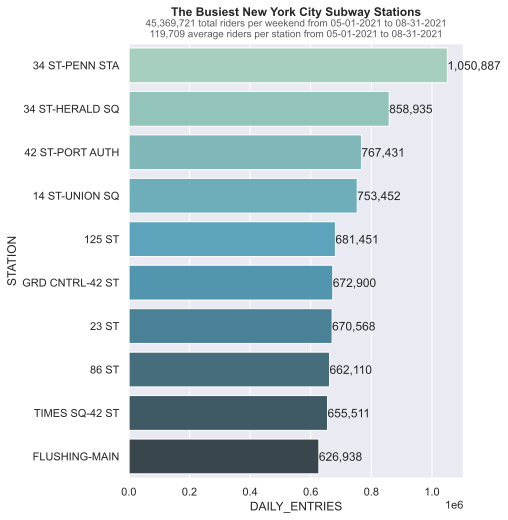

In [954]:
#weekday data
sns.set(rc={"figure.figsize":(6,8)})
ax = sns.barplot(y="STATION",x="DAILY_ENTRIES", data=stations_weekend_totals.head(10),palette="GnBu_d")



ax.text(x=0.5, y=1.058, s='The Busiest New York City Subway Stations', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.035, s='{:,.0f} total riders per weekend from 05-01-2021 to 08-31-2021'.format(int(stations_weekend_totals.DAILY_ENTRIES.sum())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.010, s='{:,.0f} average riders per station from 05-01-2021 to 08-31-2021'.format(int(stations_weekend_totals.DAILY_ENTRIES.mean())), fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)


initialx=0
for p in ax.patches:
    ax.text(p.get_width(), initialx+p.get_height()/8,"{:,.0f}".format(p.get_width()))
    initialx+=1


plt.show()


In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
fig.suptitle('The Busiest New York City Subway Stations', fontsize=12, weight='bold')

# WeekdayNone
fig = sns.barplot(ax=axes[0], x="DAILY_ENTRIES", y="STATION", data=stations_weekday_totals.sort_values('DAILY_ENTRIES', ascending=False).head(10), palette="GnBu_d")
axes[0].set_title('{:,.0f} total riders per weekday'.\
                  format(int(stations_weekday_totals.DAILY_ENTRIES.sum())), fontsize=10, alpha=0.75)
axes[0].set(xlabel='WEEKDAY DAILY ENTRIES', ylabel='')

axes[0].get_xaxis().set_visible(False)
axes[0].grid(False)
# Weekend
sns.barplot(ax=axes[1].twinx(), x="DAILY_ENTRIES", y="STATION", data=stations_weekend_totals.sort_values('DAILY_ENTRIES', ascending=False).head(10),palette="GnBu_d")
axes[1].set(xlabel='WEEKEND DAILY ENTRIES',ylabel='')

axes[1].set_title('{:,.0f} total riders per weekend'.\
                  format(int(stations_weekend_totals.DAILY_ENTRIES.sum())), fontsize=10, alpha=0.75)
    
axes[1].get_xaxis().set_visible(False)
axes[1].grid(False)
axes[1].yaxis.set_ticks_position('none') 

plt.savefig('Busiest_New_York_City_Subway.pdf')

NameError: name 'plt' is not defined

### 3. analysis result visulization

Plot the daily time series for a station.

In [962]:
station_daily_34_st_penn = station_daily[station_daily['STATION'] == '34 ST-PENN STA'].copy()
station_daily_34_st_penn.head()

,STATION,DATE,DAILY_ENTRIES
7440,34 ST-PENN STA,05/02/2021,20537.0
7441,34 ST-PENN STA,05/03/2021,38133.0
7442,34 ST-PENN STA,05/04/2021,38934.0
7443,34 ST-PENN STA,05/05/2021,38934.0
7444,34 ST-PENN STA,05/06/2021,39048.0


In [1033]:
station_daily_34_st_heard = station_daily[station_daily['STATION'] == '34 ST-HERALD SQ'].copy()
station_daily_GRD_CTR_42 = station_daily[station_daily['STATION'] == 'GRD CNTRL-42 ST'].copy()
station_daily_86_ST = station_daily[station_daily['STATION'] == '86 ST'].copy()
station_daily_42_ST = station_daily[station_daily['STATION'] == '42 ST-PORT AUTH'].copy()
station_daily_14_ST_UNIONSQ = station_daily[station_daily['STATION'] == '14 ST-UNION SQ'].copy()
station_daily_125_ST = station_daily[station_daily['STATION'] == '125 ST'].copy()


In [1143]:
def get_topN_data(busiest_stations_list):
    dfs = []
    for station in busiest_stations_list:
        dfs.append(station_daily[station_daily['STATION'] == station].copy())
    return pd.concat(dfs)


top10_stations_daily_df = get_topN_data(list(set(weekday_topN_stations[:10]).union(set(weekend_topN_stations[:10]))))


In [1147]:
top10_stations_daily_df = get_topN_data(list(set(weekday_topN_stations[:10]).union(set(weekend_topN_stations[:10]))))
top5_stations_daily_df = get_topN_data(list(set(weekday_topN_stations[:5]).union(set(weekend_topN_stations[:5]))))


In [1148]:
top10_stations_daily_df.DATE = pd.to_datetime(top10_stations_daily_df.DATE)
top5_stations_daily_df.DATE = pd.to_datetime(top5_stations_daily_df.DATE)

In [1]:
#sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

import plotly.express as px

# Without transparency
px.line(data_frame=top10_stations_daily_df, x=top10_stations_daily_df.DATE , y= top10_stations_daily_df.ENTRIES, color="STATION" )

NameError: name 'top10_stations_daily_df' is not defined

In [1151]:

# Without transparency
px.line(data_frame=top5_stations_daily_df, x=top5_stations_daily_df.DATE , y= top5_stations_daily_df.DAILY_ENTRIES, color="STATION" )

In [1152]:
# from matplotlib.dates import MONDAY
# # every monday
# mondays = mdates.WeekdayLocator(MONDAY)

# fig = plt.figure(figsize=(10,4));
# ax = fig.add_subplot(1,1,1)  

# ax.xaxis.set_major_locator(mondays)
# plt.plot(station_daily_34_st_penn['DATE'], station_daily_34_st_penn['DAILY_ENTRIES'])
# plt.plot(station_daily_GRD_CTR_42['DATE'], station_daily_GRD_CTR_42['DAILY_ENTRIES'])
# plt.plot(station_daily_86_ST['DATE'], station_daily_86_ST['DAILY_ENTRIES'])
# plt.plot(station_daily_42_ST['DATE'], station_daily_42_ST['DAILY_ENTRIES'])
# plt.plot(station_daily_14_ST_UNIONSQ['DATE'], station_daily_14_ST_UNIONSQ['DAILY_ENTRIES'])
# plt.plot(station_daily_125_ST['DATE'], station_daily_125_ST['DAILY_ENTRIES'])



# plt.ylabel('# of Entries')
# plt.xlabel('Date (Mondays)')
# plt.xticks(rotation=45)
# plt.title('34 ST-PENN STA Station');
# plt.grid(False)
# plt.legend(["34 ST-HERALD SQ", "GRD CNTRL-42 ST", "86 ST", "'42 ST-PORT AUTH", "14 ST-UNION SQ", "125 ST"])
# plt.show()

Make a list of counts for one week for one station: Monday's count, Tuesday's count, etc., so it's a list of 7 counts. Make the same list for all weeks available.

plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [366]:
station_daily_34_st_penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_st_penn['DATE']).dt.dayofweek
station_daily_34_st_penn['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_st_penn['DATE']).dt.isocalendar().week
station_daily_34_st_penn.head()

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
7440,34 ST-PENN STA,05/02/2021,20537.0,6,17
7441,34 ST-PENN STA,05/03/2021,38133.0,0,18
7442,34 ST-PENN STA,05/04/2021,38934.0,1,18
7443,34 ST-PENN STA,05/05/2021,38934.0,2,18
7444,34 ST-PENN STA,05/06/2021,39048.0,3,18


In [361]:
station_daily_34_st_penn

,STATION,DATE,DAILY_ENTRIES
7440,34 ST-PENN STA,05/02/2021,20537.0
7441,34 ST-PENN STA,05/03/2021,38133.0
7442,34 ST-PENN STA,05/04/2021,38934.0
7443,34 ST-PENN STA,05/05/2021,38934.0
7444,34 ST-PENN STA,05/06/2021,39048.0
...,...,...,...
7557,34 ST-PENN STA,08/27/2021,45901.0
7558,34 ST-PENN STA,08/28/2021,29131.0
7559,34 ST-PENN STA,08/29/2021,27651.0
7560,34 ST-PENN STA,08/30/2021,46374.0


In [365]:
mta_dfs_daily_entries.head(10)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,LINENAME,DIVISION,DATETIME,PREV_DATE,PREV_ENTRIES,DAY_OF_WEEKS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2021,7565300,NQR456W,BMT,2021-05-02 20:00:00,05/01/2021,7564974.0,6,326.0
2,A002,R051,02-00-00,59 ST,05/03/2021,7565798,NQR456W,BMT,2021-05-03 20:00:00,05/02/2021,7565300.0,0,498.0
3,A002,R051,02-00-00,59 ST,05/04/2021,7566364,NQR456W,BMT,2021-05-04 20:00:00,05/03/2021,7565798.0,1,566.0
4,A002,R051,02-00-00,59 ST,05/05/2021,7566964,NQR456W,BMT,2021-05-05 20:00:00,05/04/2021,7566364.0,2,600.0
5,A002,R051,02-00-00,59 ST,05/06/2021,7567550,NQR456W,BMT,2021-05-06 20:00:00,05/05/2021,7566964.0,3,586.0
6,A002,R051,02-00-00,59 ST,05/07/2021,7568106,NQR456W,BMT,2021-05-07 20:00:00,05/06/2021,7567550.0,4,556.0
7,A002,R051,02-00-00,59 ST,05/08/2021,7568516,NQR456W,BMT,2021-05-08 20:00:00,05/07/2021,7568106.0,5,410.0
8,A002,R051,02-00-00,59 ST,05/09/2021,7568840,NQR456W,BMT,2021-05-09 20:00:00,05/08/2021,7568516.0,6,324.0
9,A002,R051,02-00-00,59 ST,05/10/2021,7569369,NQR456W,BMT,2021-05-10 20:00:00,05/09/2021,7568840.0,0,529.0
10,A002,R051,02-00-00,59 ST,05/11/2021,7570014,NQR456W,BMT,2021-05-11 20:00:00,05/10/2021,7569369.0,1,645.0
